# TER: Aide à l’orientation dans le supérieur : Logistic Regression (2 classes)


In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Colab Notebooks/TER/" 

Mounted at /content/drive


In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


In [4]:
import warnings
warnings.filterwarnings('ignore')


### Selection du nouveau train set et test set précédemment générés 


In [5]:
# données de train
df1_train = pd.read_csv(path+'generated_data_class2/train1.csv')
df2_train = pd.read_csv(path+'generated_data_class2/train2.csv')
df3_train = pd.read_csv(path+'generated_data_class2/train3.csv')
df4_train = pd.read_csv(path+'generated_data_class2/train4.csv')
df5_train = pd.read_csv(path+'generated_data_class2/train5.csv')
df6_train = pd.read_csv(path+'generated_data_class2/train6.csv')
df7_train = pd.read_csv(path+'generated_data_class2/train7.csv')
df8_train = pd.read_csv(path+'generated_data_class2/train8.csv')
df9_train = pd.read_csv(path+'generated_data_class2/train9.csv')
df10_train = pd.read_csv(path+'generated_data_class2/train10.csv')
df11_train = pd.read_csv(path+'generated_data_class2/train11.csv')
df12_train = pd.read_csv(path+'generated_data_class2/train12.csv')
df13_train = pd.read_csv(path+'generated_data_class2/train13.csv')
df14_train = pd.read_csv(path+'generated_data_class2/train14.csv')
df15_train = pd.read_csv(path+'generated_data_class2/train15.csv')

#données de test
df1_test = pd.read_csv(path+'generated_data_class2/test1.csv')
df2_test = pd.read_csv(path+'generated_data_class2/test2.csv')
df3_test = pd.read_csv(path+'generated_data_class2/test3.csv')
df4_test = pd.read_csv(path+'generated_data_class2/test4.csv')
df5_test = pd.read_csv(path+'generated_data_class2/test5.csv')
df6_test = pd.read_csv(path+'generated_data_class2/test6.csv')
df7_test = pd.read_csv(path+'generated_data_class2/test7.csv')
df8_test = pd.read_csv(path+'generated_data_class2/test8.csv')
df9_test = pd.read_csv(path+'generated_data_class2/test9.csv')
df10_test = pd.read_csv(path+'generated_data_class2/test10.csv')
df11_test = pd.read_csv(path+'generated_data_class2/test11.csv')
df12_test = pd.read_csv(path+'generated_data_class2/test12.csv')
df13_test = pd.read_csv(path+'generated_data_class2/test13.csv')
df14_test = pd.read_csv(path+'generated_data_class2/test14.csv')
df15_test = pd.read_csv(path+'generated_data_class2/test15.csv')

df_train = [df1_train,df2_train,df3_train,df4_train,df5_train,df6_train,df7_train,df8_train,df9_train,df10_train,df11_train,df12_train,df13_train,df14_train,df15_train]
df_test = [df1_test,df2_test,df3_test,df4_test,df5_test,df6_test,df7_test,df8_test,df9_test,df10_test,df11_test,df12_test,df13_test,df14_test,df15_test]

In [6]:
#résultats des élèves classe 0(echecs) ou 1(reussites)
y_col = 'resultats_iut_tdats1'

Prepare Data

In [7]:
X_train,y_train,X_test,y_test = [],[],[],[]

for i in range(15):
    dfi_train = df_train[i]
    dfi_test = df_test[i]
    y_train.append(dfi_train[y_col])
    X_train.append(dfi_train[dfi_train.columns.drop(y_col)])
    y_test.append(dfi_test[y_col])
    X_test.append(dfi_test[dfi_test.columns.drop(y_col)])
    
    #it's usually a good practice to use feature scaling, such as standardization, 
    #before training a logistic regression model. Standardization rescales the features 
    #to have a mean of 0 and a standard deviation of 1, which can help improve the performance of the model, 
    #especially if the features have different scales or units.
    sc = StandardScaler()
    X_train[i] = sc.fit_transform(X_train[i])
    X_test[i] = sc.transform(X_test[i])

### Logistic Regression

In [12]:
 
# Creating an instance of LogisticRegression model
lr_model = LogisticRegression()

# Defining the parameters for grid search
#Specifies the type of regularization to be applied. 
#The two most common types of regularization are L1 regularization (penalty='l1')
# and L2 regularization (penalty='l2'). By default, no regularization is applied (penalty=None).
param_grid = {
    #Specifies the type of regularization to be applied. 
    #The two most common types of regularization are L1 regularization (penalty='l1')
    # and L2 regularization (penalty='l2'). By default, no regularization is applied (penalty=None).
    'penalty': ['l1', 'l2'],
    # Inverse of regularization strength. 
    # Smaller values of C result in stronger regularization, and larger values result in weaker regularization. 
    # The default value is 1.
    'C': [0.1, 1, 10], 
    #Specifies the algorithm to be used for optimization. 
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'] }
  

# Creating an instance of GridSearchCV class
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5)

Acc, Precis, Recall, F1 = [],[],[],[]
y_pred = []

for i in range(15):
  # Fitting the GridSearchCV object on the training set
  grid_search.fit(X_train[i], y_train[i])


  # Getting the best model and its parameters
  best_model = grid_search.best_estimator_
  best_params = grid_search.best_params_

  # Making predictions on the test set using the best model
  y_predicted = best_model.predict(X_test[i])
  y_pred.append(y_predicted)

  # Calculating the evaluation metrics
  accuracy = accuracy_score(y_test[i], y_predicted)
  Acc.append(accuracy)
  precision = precision_score(y_test[i], y_predicted)
  Precis.append(precision)
  recall = recall_score(y_test[i], y_predicted)
  Recall.append(recall)
  f1 = f1_score(y_test[i], y_predicted)
  F1.append(f1)

  # Printing the evaluation metrics and the best hyperparameters
  print(' ')
  print('DATASET ', i+1)
  print("Best hyperparameters: ", best_params)
  print("Accuracy: ", accuracy)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1 score: ", f1)


 
DATASET  1
Best hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy:  0.7560975609756098
Precision:  0.8333333333333334
Recall:  0.8823529411764706
F1 score:  0.8571428571428571
 
DATASET  2
Best hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy:  0.7073170731707317
Precision:  0.7297297297297297
Recall:  0.9310344827586207
F1 score:  0.8181818181818181
 
DATASET  3
Best hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:  0.7317073170731707
Precision:  0.78125
Recall:  0.8620689655172413
F1 score:  0.8196721311475409
 
DATASET  4
Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy:  0.6829268292682927
Precision:  0.7096774193548387
Recall:  0.8461538461538461
F1 score:  0.7719298245614036
 
DATASET  5
Best hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy:  0.7560975609756098
Precision:  0.8125
Recall:  0.8666666666666667
F1 score:  0.8387096774193549
 
DATA

#### Moyenne des valeurs des métriques pour chaque Dataset

In [13]:
print("Mean of test accuracy for the 15 dataset = ", np.mean(Acc))
print("Mean of test f1_score for the 15 dataset = ", np.mean(Precis))
print("Mean of test precision for the 15 dataset = ", np.mean(Recall))
print("Mean of test recall for the 15 dataset = ", np.mean(F1))

Mean of test accuracy for the 15 dataset =  0.7317073170731707
Mean of test f1_score for the 15 dataset =  0.7892456354967806
Mean of test precision for the 15 dataset =  0.8680526807140528
Mean of test recall for the 15 dataset =  0.8216754584262149


Matrice de confusion

Confusion matrix, without normalization
[[ 1  6]
 [ 4 30]]


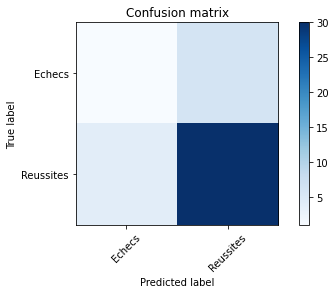

Confusion matrix, without normalization
[[ 2 10]
 [ 2 27]]


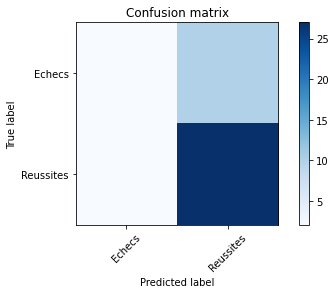

Confusion matrix, without normalization
[[ 5  7]
 [ 4 25]]


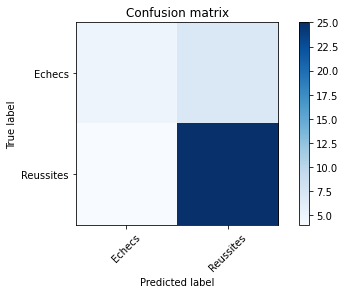

Confusion matrix, without normalization
[[ 6  9]
 [ 4 22]]


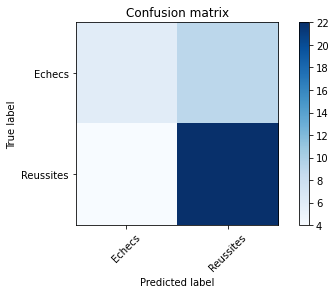

Confusion matrix, without normalization
[[ 5  6]
 [ 4 26]]


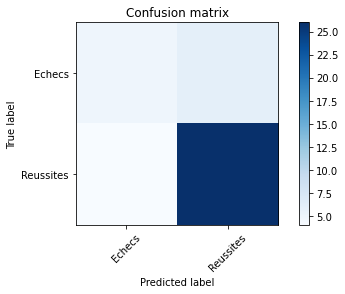

Confusion matrix, without normalization
[[ 7  3]
 [ 4 27]]


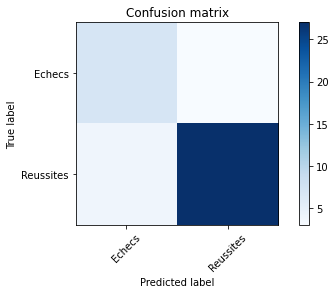

Confusion matrix, without normalization
[[ 4  8]
 [ 5 24]]


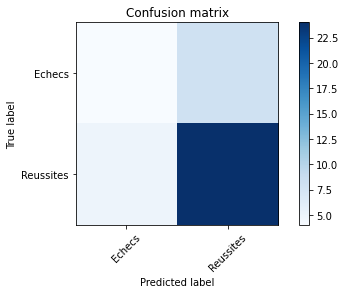

Confusion matrix, without normalization
[[ 5  7]
 [ 8 21]]


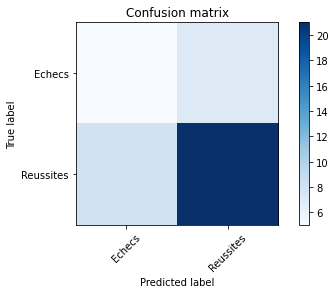

Confusion matrix, without normalization
[[ 1 11]
 [ 0 29]]


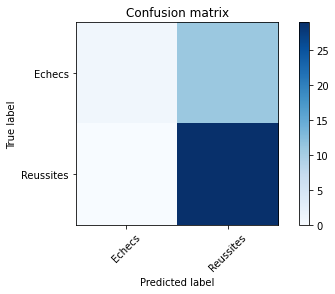

Confusion matrix, without normalization
[[ 7  2]
 [10 22]]


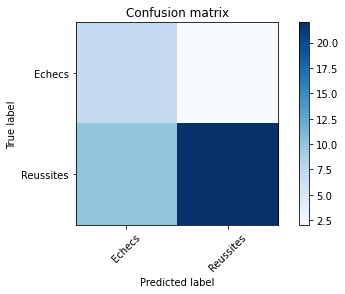

Confusion matrix, without normalization
[[ 4  5]
 [ 3 29]]


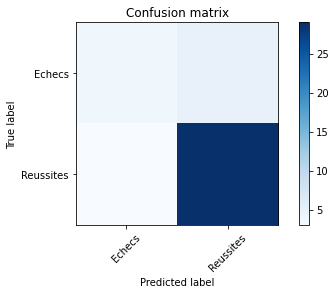

Confusion matrix, without normalization
[[ 8  5]
 [ 4 24]]


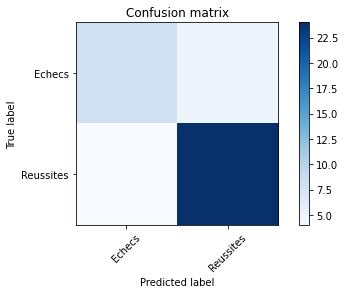

Confusion matrix, without normalization
[[ 3  6]
 [ 2 30]]


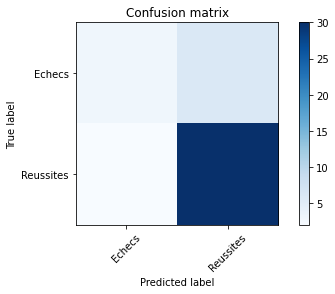

Confusion matrix, without normalization
[[ 6  7]
 [ 5 23]]


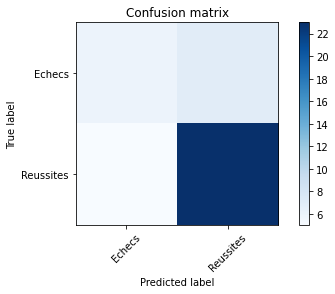

Confusion matrix, without normalization
[[ 1 14]
 [ 0 26]]


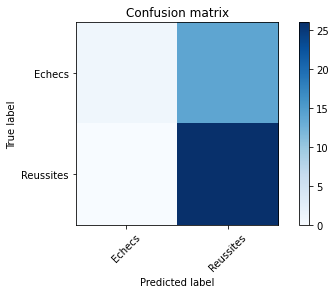

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for i in range(15):
  # Compute confusion matrix
  cm = confusion_matrix(y_test[i], y_pred[i])
  np.set_printoptions(precision=2)
  print('Confusion matrix, without normalization')
  print(cm)

  classes = ['Echecs', 'Reussites']

  # Plot confusion matrix
  plt.figure()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


### Roc Curve

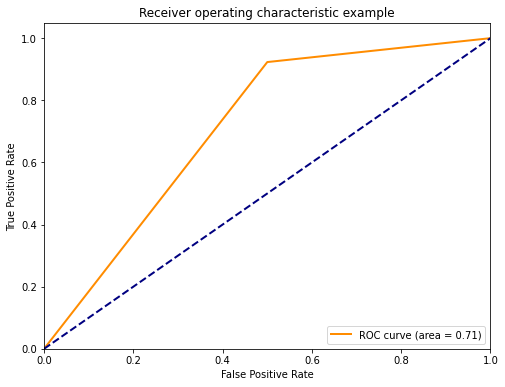

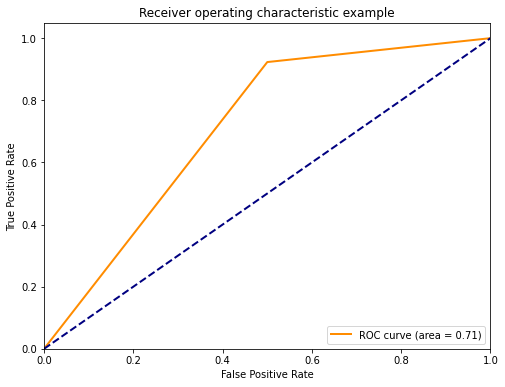

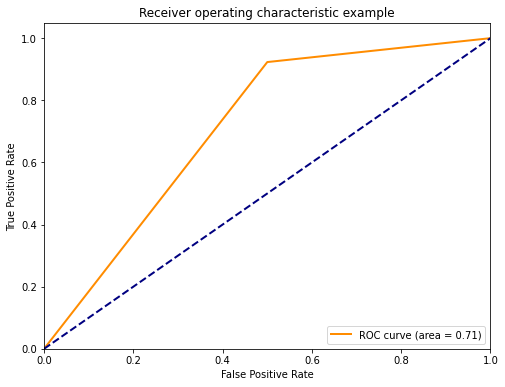

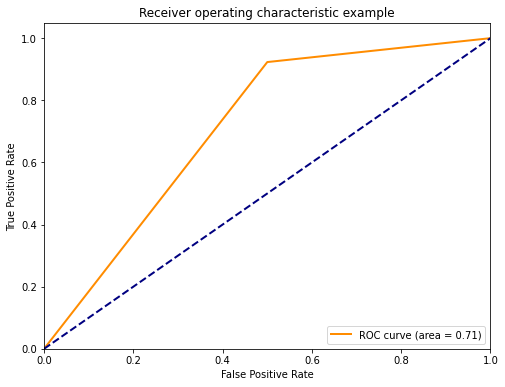

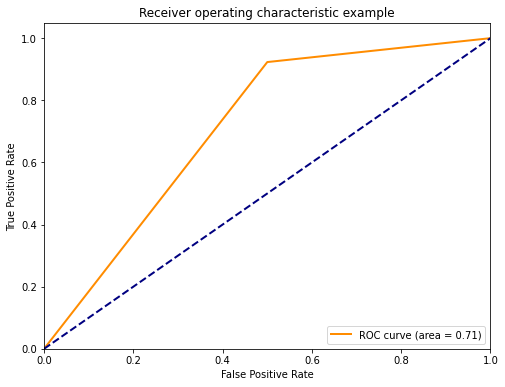

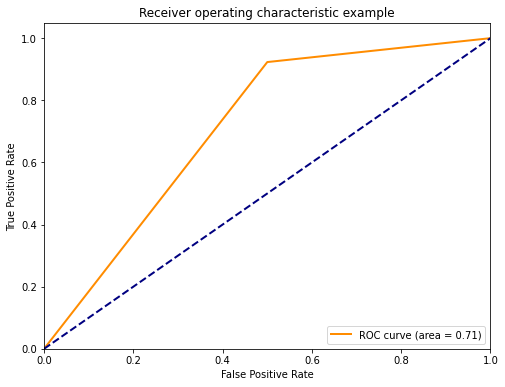

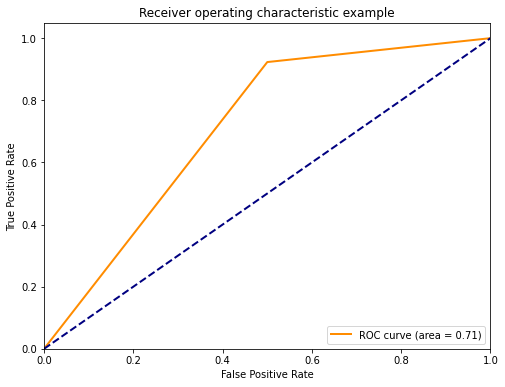

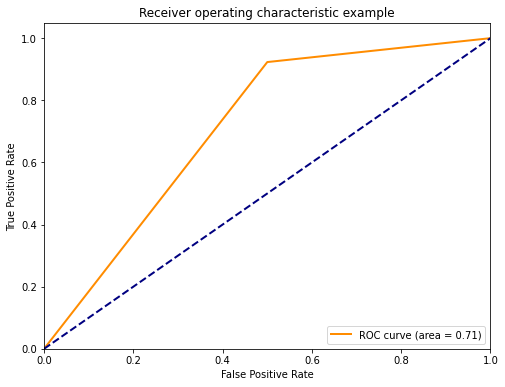

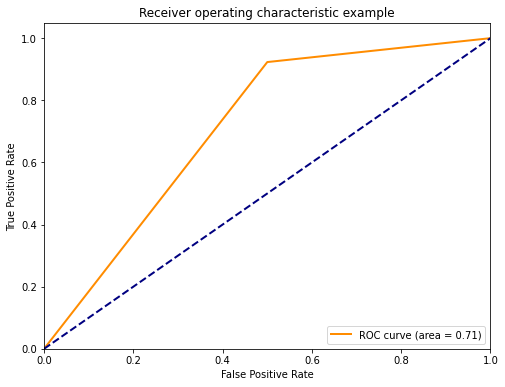

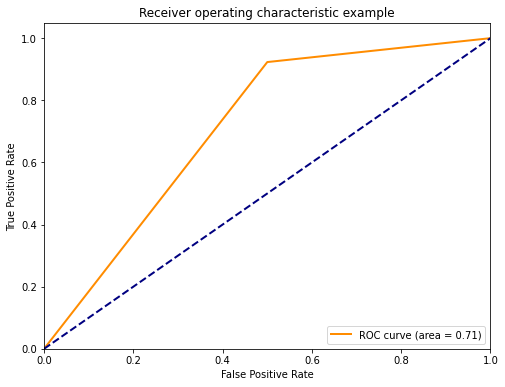

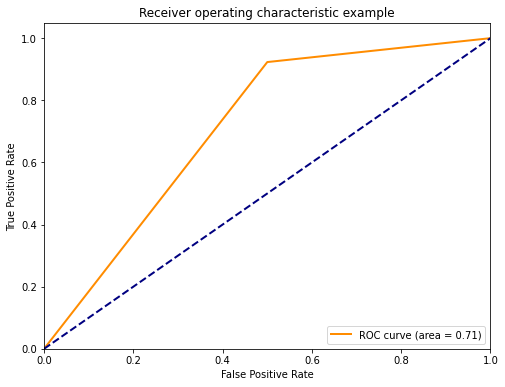

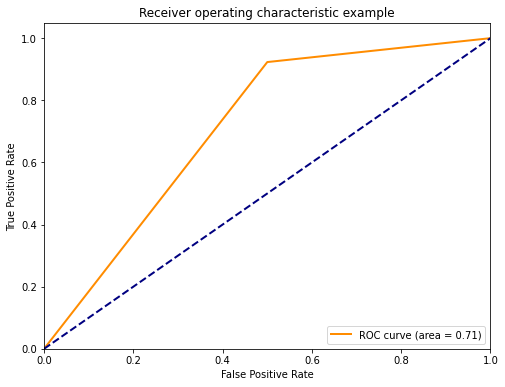

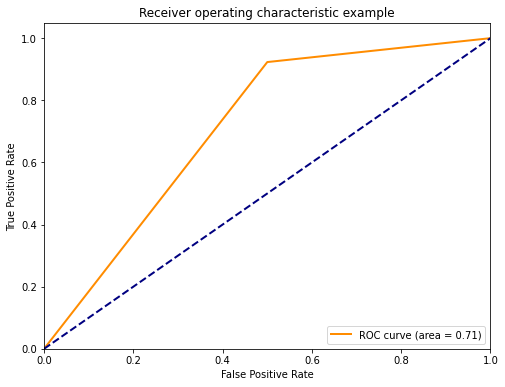

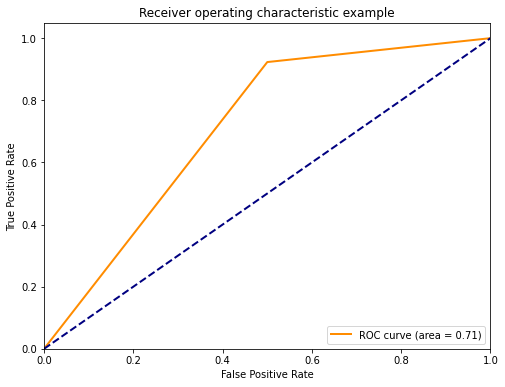

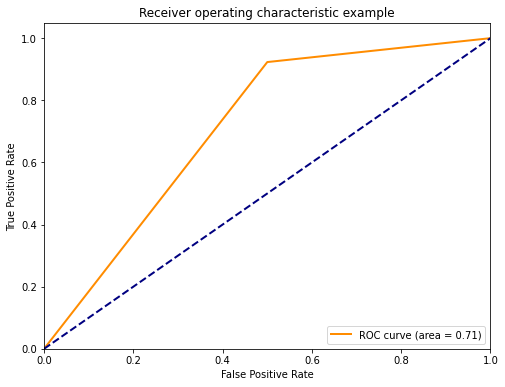

In [19]:
from sklearn.metrics import roc_curve, auc

# Convert y_test and y_pred to arrays
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Compute ROC curve and ROC area for the first binary classification problem (index 0)
fpr, tpr, _ = roc_curve(y_test_array[:, i], y_pred_array[:, i])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
